<a href="https://colab.research.google.com/github/fabricio-franca/Data_Science/blob/main/modelo_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descrição do Problema de Negócio**

A **Sohipren Innovation** enfrenta o desafio de prever com precisão as pré-vendas de seus produtos e serviços, o que é crucial para garantir um planejamento eficiente e uma melhor alocação de recursos. A ausência de previsões assertivas pode levar a situações como estoques inadequados (excesso ou falta), campanhas de marketing mal direcionadas ou recursos operacionais subutilizados.

O objetivo deste projeto é desenvolver um modelo preditivo baseado em dados históricos de vendas, que permitirá antecipar o comportamento das pré-vendas com maior precisão. Com essas previsões, a Sohipren Innovation poderá:

1. **Otimizar Estoques:**
   - Garantir que os produtos certos estejam disponíveis no momento certo, reduzindo custos de armazenamento e evitando rupturas de estoque.

2. **Planejar Campanhas de Marketing de Forma Estratégica:**
   - Direcionar ações promocionais para os produtos com maior potencial de vendas em determinados períodos ou regiões.

3. **Aumentar a Eficiência Operacional:**
   - Ajustar recursos, como logística e equipe, de acordo com a demanda prevista, maximizando a produtividade e minimizando desperdícios.

4. **Tomar Decisões Baseadas em Dados:**
   - Oferecer à gestão insights valiosos para definir estratégias a curto, médio e longo prazo, alinhando ações ao comportamento do mercado.

Este modelo preditivo será uma ferramenta estratégica para transformar dados em vantagem competitiva, ajudando a empresa a antecipar movimentos de mercado e a responder de forma proativa às mudanças na demanda. O sucesso do projeto terá impacto direto na redução de custos, no aumento de receitas e na satisfação dos clientes.

##Coleta e Análise de Dados

Utilizaremos a biblioteca pandas para carregar e analisar os dados da planilha Excel fornecida. A análise exploratória inicial nos ajudará a entender a estrutura dos dados e identificar padrões relevantes.

In [28]:
import pandas as pd

# Carregar a planilha Excel
file_path = '/content/BASE DE DADOS - PROJETO FIAP.xlsx'
df = pd.read_excel(file_path)

# Exibir as primeiras linhas do DataFrame
print(df.head())

       NF  ST    CFOP    EMISSÃO  VEND.          RAZÃO SOCIAL CLIENTE  UF  \
0  23269.0  A  6101.0 2024-10-31    0.0  LM AUTOMACAO E SERVICOS LTDA  GO   
1  23268.0  A  5101.0 2024-10-31    1.0            MFW MAQUINAS LTDA.  SP   
2  23268.0  A  5101.0 2024-10-31    1.0            MFW MAQUINAS LTDA.  SP   
3  23267.0  A  5102.0 2024-10-31    0.0         TVH BRASIL PECAS LTDA  SP   
4  23267.0  A  5102.0 2024-10-31    0.0         TVH BRASIL PECAS LTDA  SP   

           CÓD.MAT.                                 DESCRIÇÃO MATERIAL  \
0  5.0521.L026987.0               MC1 26 201.2.21.69/26.69/8.C3/8.C3.L   
1  5.0521.L025909.0                         MC1 60 201.2.37.66/8.C21.L   
2  5.1678.L080963.0              VALVULA DE CONTRA BALANCO SIMPLES 3/8   
3  5.1301.0565002.0  BOMBA APLICACAO CNH A-002 (EONN600AC - 8395737...   
4  5.1301.0565017.0      BOMBA APLICACAO CNH A-017   GIRO D (82988360)   

  UNID. MEDIDA  QUANTIDADE  VALOR UNITÁRIO VALOR TOTAL  
0           UN         1.0         

In [29]:
# Informações gerais sobre o DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27505 entries, 0 to 27504
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   NF                    27503 non-null  float64       
 1   ST                    27503 non-null  object        
 2   CFOP                  27503 non-null  float64       
 3   EMISSÃO               27503 non-null  datetime64[ns]
 4   VEND.                 27503 non-null  float64       
 5   RAZÃO SOCIAL CLIENTE  27503 non-null  object        
 6   UF                    27503 non-null  object        
 7   CÓD.MAT.              27503 non-null  object        
 8   DESCRIÇÃO MATERIAL    27503 non-null  object        
 9   UNID. MEDIDA          27503 non-null  object        
 10  QUANTIDADE            27503 non-null  float64       
 11  VALOR UNITÁRIO        27468 non-null  float64       
 12  VALOR TOTAL           27505 non-null  object        
dtypes: datetime64[ns

*   As colunas 'NF', 'ST', 'CFOP', 'EMISSÃO', 'VEND.', 'RAZÃO SOCIAL CLIENTE', 'UF', 'CÓD.MAT.', 'DESCRIÇÃO MATERIAL', 'UNID. MEDIDA' e 'QUANTIDADE' possuem 27.503 valores não nulos, indicando a presença de 2 valores ausentes em cada.

*   A coluna 'VALOR UNITÁRIO' contém 27.468 valores não nulos, sugerindo 37 valores ausentes.


*   Apesar de 'VALOR TOTAL' não apresentar valores ausentes, seu tipo de dado é 'object', indicando que os valores podem estar armazenados como strings. Para realizar operações numéricas, é recomendável converter essa coluna para um tipo numérico adequado, como float.





In [30]:
print(df['VALOR TOTAL'].dtype)



object


In [31]:
# Filtrar linhas onde 'VALOR TOTAL' não é um espaço em branco
df = df[df['VALOR TOTAL'].str.strip() != '']

# Converter a coluna para float
df['VALOR TOTAL'] = df['VALOR TOTAL'].astype(float)

<ipython-input-31-de0172f06f90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VALOR TOTAL'] = df['VALOR TOTAL'].astype(float)


In [32]:
print(df.head())

       NF  ST    CFOP    EMISSÃO  VEND.          RAZÃO SOCIAL CLIENTE  UF  \
0  23269.0  A  6101.0 2024-10-31    0.0  LM AUTOMACAO E SERVICOS LTDA  GO   
1  23268.0  A  5101.0 2024-10-31    1.0            MFW MAQUINAS LTDA.  SP   
2  23268.0  A  5101.0 2024-10-31    1.0            MFW MAQUINAS LTDA.  SP   
3  23267.0  A  5102.0 2024-10-31    0.0         TVH BRASIL PECAS LTDA  SP   
4  23267.0  A  5102.0 2024-10-31    0.0         TVH BRASIL PECAS LTDA  SP   

           CÓD.MAT.                                 DESCRIÇÃO MATERIAL  \
0  5.0521.L026987.0               MC1 26 201.2.21.69/26.69/8.C3/8.C3.L   
1  5.0521.L025909.0                         MC1 60 201.2.37.66/8.C21.L   
2  5.1678.L080963.0              VALVULA DE CONTRA BALANCO SIMPLES 3/8   
3  5.1301.0565002.0  BOMBA APLICACAO CNH A-002 (EONN600AC - 8395737...   
4  5.1301.0565017.0      BOMBA APLICACAO CNH A-017   GIRO D (82988360)   

  UNID. MEDIDA  QUANTIDADE  VALOR UNITÁRIO  VALOR TOTAL  
0           UN         1.0        

In [33]:
# Estatísticas descritivas
print(df.describe())

                NF           CFOP                        EMISSÃO  \
count  27503.000000  27503.000000                          27503   
mean   14316.332037   5782.732611  2022-02-12 04:54:15.092171776   
min        1.000000   5101.000000            2019-01-08 00:00:00   
25%    10905.500000   5101.000000            2020-10-16 00:00:00   
50%    14941.000000   5401.000000            2022-02-22 00:00:00   
75%    18952.000000   6101.000000            2023-07-26 00:00:00   
max    23269.000000   7501.000000            2024-10-31 00:00:00   
std     5899.879103    766.983889                            NaN   

              VEND.    QUANTIDADE  VALOR UNITÁRIO   VALOR TOTAL  
count  27503.000000  27503.000000    27468.000000  2.750400e+04  
mean       8.027524    158.927231      709.044196  5.740117e+03  
min        0.000000      0.000000        0.040680  0.000000e+00  
25%        0.000000      1.000000      298.000000  6.200150e+02  
50%        1.000000      2.000000      555.000000  1.2300

### **Resumo da Análise dos Dados**

1. **Geral:**
   - O conjunto possui 27.503 registros, com dados de **2019 a 2024**.
   - A maior parte das vendas ocorre em pequenos volumes e valores totais moderados (mediana de R$1.230 por nota).

2. **Padrões Identificados:**
   - **VALOR UNITÁRIO:** 75% dos itens custam até R$935, sugerindo um mercado dominado por produtos de valor acessível.
   - **VALOR TOTAL:** 75% das notas têm valores totais abaixo de R$2.760, indicando vendas de pequeno/médio porte.
   - **QUANTIDADE:** Alta variabilidade, com notas variando de 1 a 26.000 itens.

3. **Casos Excepcionais:**
   - Notas fiscais com valores totais extremamente altos (até R$78 milhões) ou grandes volumes (26.000 itens) indicam **outliers** que devem ser analisados individualmente.

4. **Dados Recentes:**
   - A maior parte dos registros é de **2020 a 2023**, sendo dados atualizados e relevantes para modelagem preditiva.

5. **Ações:**
   - Investigar outliers para entender desvios.

##Pré-processamento

Nesta etapa, trataremos valores ausentes, removeremos outliers e normalizaremos as variáveis para garantir a consistência dos dados. Em seguida, dividiremos os dados em conjuntos de treinamento e teste utilizando a validação Hold-out.

In [39]:
import numpy as np

df_numerico = df.select_dtypes(include=[np.number])
media = df_numerico.mean()
desvio_padrao = df_numerico.std()
mascara = (df_numerico - media).abs() <= 3 * desvio_padrao
df_sem_outliers = df[mascara.all(axis=1)]

In [48]:
Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
mascara_outliers = (df_numerico < limite_inferior) | (df_numerico > limite_superior)
df = df_numerico[~mascara_outliers.any(axis=1)]
print(df)

           NF     CFOP  VEND.  QUANTIDADE  VALOR UNITÁRIO  VALOR TOTAL
1      23268.0  5101.0    1.0         3.0          1299.0       3897.0
2      23268.0  5101.0    1.0         2.0           574.0       1148.0
3      23267.0  5102.0    0.0         2.0          1698.0       3396.0
5      23265.0  5101.0    0.0         1.0           467.0        467.0
6      23264.0  5101.0    0.0         2.0           992.0       1984.0
...        ...     ...    ...         ...             ...          ...
27498      5.0  6102.0   24.0         1.0           724.5        724.5
27499      4.0  5102.0   24.0         2.0           580.0       1160.0
27500      3.0  6102.0   24.0         1.0           700.0        700.0
27501      2.0  5102.0   24.0         2.0           880.0       1760.0
27502      1.0  5102.0   24.0         3.0           880.0       2640.0

[20778 rows x 6 columns]


In [52]:
X = df.drop(columns=['VALOR TOTAL'])
y = df['VALOR TOTAL']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Modelagem

Escolheremos um modelo de Machine Learning adequado, como a Regressão Linear, para prever as pré-vendas com base nas variáveis disponíveis.

In [53]:
from sklearn.linear_model import LinearRegression

# Inicializar o modelo de Regressão Linear
modelo = LinearRegression()

# Treinar o modelo com os dados de treinamento
modelo.fit(X_train, y_train)


LinearRegression()

##Validação

Avaliaremos o desempenho do modelo utilizando métricas como o Erro Quadrático Médio (MSE) e o Coeficiente de Determinação (R²).

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

# Fazer previsões com os dados de teste
y_pred = modelo.predict(X_test)

# Calcular o Erro Quadrático Médio
mse = mean_squared_error(y_test, y_pred)
print(f'Erro Quadrático Médio (MSE): {mse}')

# Calcular o Coeficiente de Determinação
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de Determinação (R²): {r2}')


Erro Quadrático Médio (MSE): 352420.21013391344
Coeficiente de Determinação (R²): 0.7488925412614551


O Erro Quadrático Médio (MSE) de 352.420,21 indica que, em média, as previsões do modelo diferem dos valores reais em aproximadamente 352.420,21 unidades ao quadrado. Como o MSE é expresso em unidades ao quadrado da variável dependente, sua interpretação direta pode ser menos intuitiva.

O Coeficiente de Determinação (R²) de 0,7489 revela que cerca de 74,89% da variação nos dados é explicada pelo modelo. Isso sugere um bom ajuste, indicando que o modelo captura a maior parte da variabilidade dos dados.

Em resumo, o modelo apresenta um bom desempenho, explicando uma parcela significativa da variação nos dados. No entanto, o MSE relativamente alto sugere que ainda há espaço para melhorias na precisão das previsões.

##Apresentação dos Resultados

Os resultados serão apresentados por meio de relatórios detalhados com visualizações claras, como gráficos de tendências e tabelas comparativas. Utilizaremos bibliotecas como matplotlib e seaborn para criar as visualizações.

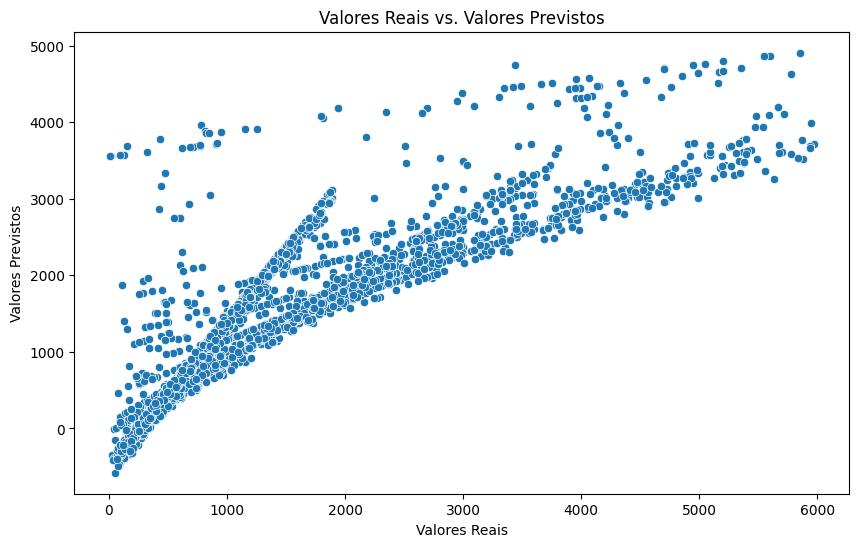

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersão entre valores reais e previstos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos')
plt.show()


#O que o gráfico nos diz?

###Linha de Tendência Ideal:

Se o modelo fosse perfeito, todos os pontos deveriam se alinhar em uma diagonal reta (linha imaginária 45°), onde o valor previsto seria exatamente igual ao valor real.
Neste gráfico, vemos que muitos pontos estão próximos dessa linha, o que indica que o modelo está fazendo boas previsões em vários casos.

###Desvios dos Pontos:

Há uma dispersão dos pontos ao redor da linha ideal, especialmente em valores mais altos (acima de 3000). Isso mostra que, embora o modelo esteja capturando bem a tendência geral, ele tem dificuldade em prever com precisão alguns casos específicos.

###Casos de Subestimação e Superestimação:

Quando os pontos estão abaixo da linha diagonal, significa que o modelo está subestimando os valores reais (prevendo menos do que deveria).
Quando os pontos estão acima da linha diagonal, o modelo está superestimando os valores reais (prevendo mais do que deveria).

###Comportamento em Valores Baixos e Altos:

Para valores mais baixos (próximos de zero), os pontos estão bem alinhados, indicando que o modelo tem um bom desempenho para vendas menores.
Para valores mais altos (acima de 4000), há maior dispersão, o que sugere que o modelo tem mais dificuldade em prever corretamente vendas muito altas.

#O que isso significa para o negócio?

###Previsões Consistentes na Maioria dos Casos:

O modelo é confiável para a maioria das previsões, especialmente para valores de vendas mais comuns ou moderados.
Isso significa que o modelo pode ser útil para auxiliar no planejamento do dia a dia.

###Casos Excepcionais:

A dificuldade em prever valores muito altos ou baixos pode ser devido à falta de dados representativos nessas faixas ou a características específicas desses casos que o modelo não consegue captar.
Esses casos excepcionais podem precisar de análises separadas ou de ajustes adicionais no modelo.

###Oportunidade de Melhoria:

Se os valores altos forem críticos para o negócio, podemos ajustar o modelo (adicionando mais variáveis ou utilizando técnicas complementares) para melhorar essas previsões.

#Conclusão

O gráfico mostra que o modelo está capturando bem a relação entre as variáveis para a maioria dos casos, mas existem algumas previsões que podem ser aprimoradas, especialmente para vendas muito altas. O modelo já é uma ferramenta útil para previsões gerais, mas há espaço para refinamentos em situações específicas.

##Possíveis refinam

###Adição de Novas Variáveis Relevantes:

O modelo atual pode não estar considerando informações importantes que influenciam vendas maiores. Por exemplo:
Região geográfica (UF): Algumas regiões podem apresentar padrões de venda distintos.

###Categoria de produto (CFOP ou tipo do material):

Produtos diferentes podem ter comportamentos de venda diferentes.
Datas específicas: Sazonalidades ou datas comemorativas podem impactar o volume de vendas.

###Transformação de Variáveis Existentes:

Algumas variáveis podem precisar de transformações para capturar melhor os padrões nos dados:
Logaritmo ou escalonamento: Para tratar grandes diferenças de escala entre variáveis.
Interações entre variáveis: Por exemplo, a interação entre a quantidade e o valor unitário pode melhorar a previsão do valor total.

###Revisão de Outliers:

Casos muito distantes dos padrões (outliers) podem estar influenciando o modelo negativamente. Refinamentos podem incluir:
Remoção ou ajuste manual desses casos.
Uso de modelos mais robustos a outliers, como regressão robusta.

###Estratificação do Modelo:

Dividir os dados em grupos específicos e treinar modelos separados para cada grupo. Por exemplo:
Um modelo específico para vendas de baixo valor.
Um modelo diferente para vendas de alto valor.

###Ajuste Fino do Modelo Atual:

Explorar técnicas para melhorar o ajuste da regressão linear mais avançadas, ajuda a reduzir a variabilidade nos coeficientes e a evitar overfitting.
Seleção de variáveis automáticas: Para identificar as variáveis mais relevantes no modelo.

###Uso de Modelos Complementares:

Para complementar a regressão linear, pode-se experimentar modelos mais avançados em paralelo:
Árvores de decisão ou Random Forests: Capturam interações complexas entre variáveis.
Modelos baseados em boosting (e.g., XGBoost): Podem melhorar a precisão em casos extremos.

###Revisão da Amostra de Dados:

Garantir que os dados usados no treinamento são representativos de todos os cenários possíveis, especialmente os casos de vendas altas ou incomuns.
Se necessário, coletar mais dados históricos para enriquecer o modelo.
Oportunidades para o Negócio
Com esses refinamentos, podemos melhorar significativamente a precisão do modelo, especialmente em previsões de vendas atípicas ou de alto valor, que frequentemente têm maior impacto no planejamento estratégico do negócio. Implementar essas melhorias pode tornar as previsões ainda mais úteis para decisões como alocação de recursos, planejamento de estoque e estratégias de precificação.

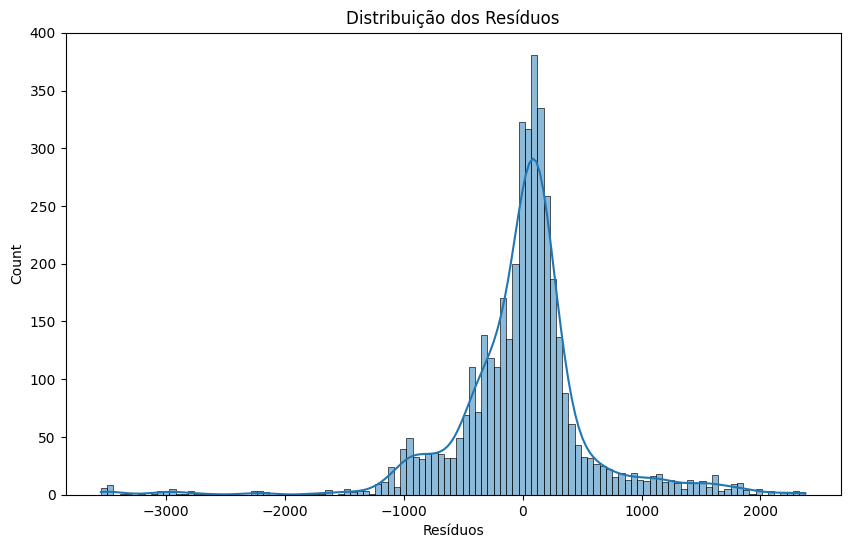

In [62]:
# Histograma dos resíduos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Resíduos')
plt.title('Distribuição dos Resíduos')
plt.show()

###Resíduos próximos de zero:

A maior parte dos erros está concentrada perto do zero, o que significa que, na maioria dos casos, o modelo está fazendo boas previsões.
Quando o resíduo é zero ou muito próximo disso, o valor previsto pelo modelo é quase igual ao valor real.

###Simetria:

O gráfico é bastante simétrico, com uma curva que sobe e desce igualmente dos dois lados do zero.
Isso nos indica que o modelo não está "puxando" os resultados para cima nem para baixo, ou seja, não tem um viés. Ele erra para mais e para menos de forma equilibrada.

###Resíduos maiores:

Existem alguns erros maiores, tanto positivos quanto negativos, mas eles são poucos. Esses pontos podem ser casos especiais nos dados que o modelo não conseguiu prever bem.
Esses erros maiores podem ser explicados por situações fora do padrão ou por falta de informações que poderiam ajudar o modelo a prever melhor.


Variáveis que mais afetam o valor da venda (VALOR TOTAL):
         Variável  Coeficiente  Importância Absoluta
3      QUANTIDADE   884.456174            884.456174
4  VALOR UNITÁRIO   780.362158            780.362158
1            CFOP   -64.520178             64.520178
2           VEND.   -50.091162             50.091162
0             NF      4.029570              4.029570


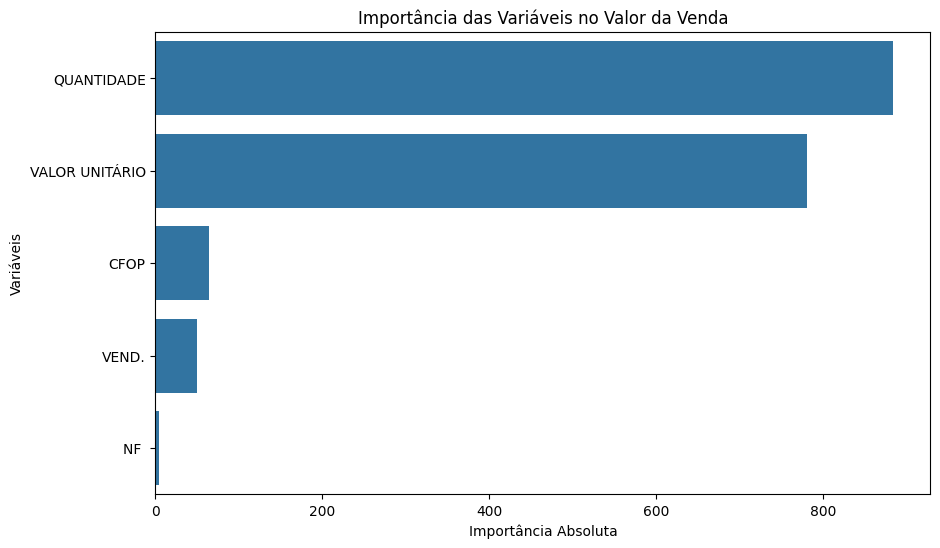

In [60]:
# Identificar as variáveis que mais afetam "VALOR TOTAL"
# Usar as colunas originais do DataFrame X para feature_names
feature_names = X.columns.tolist()  # Obter os nomes reais das colunas de X
coef_df = pd.DataFrame({
    'Variável': feature_names,
    'Coeficiente': modelo.coef_
})
coef_df['Importância Absoluta'] = np.abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values(by='Importância Absoluta', ascending=False)

print("\nVariáveis que mais afetam o valor da venda (VALOR TOTAL):")
print(coef_df)

# Visualizar a importância das variáveis
plt.figure(figsize=(10, 6))
sns.barplot(x='Importância Absoluta', y='Variável', data=coef_df)
plt.title('Importância das Variáveis no Valor da Venda')
plt.xlabel('Importância Absoluta')
plt.ylabel('Variáveis')
plt.show()
